# Install required packages

In [1]:
!pip install -r Text_Files/packages_need.txt

# Import required packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import *

# Load SNIa Datafile from http://supernova.lbl.gov/Union/

In [3]:
from urllib.request import urlopen
downloaded_data  = urlopen('http://supernova.lbl.gov/Union/figures/SCPUnion2.1_mu_vs_z.txt')
mu_JLA_data=np.loadtxt(downloaded_data,skiprows=5,converters={0: lambda s: 0})
z_JLA=mu_JLA_data[:,1]
mu_JLA=mu_JLA_data[:,2]
sig_mu_JLA=mu_JLA_data[:,3]

# Calculate Luminosity Distance $d_L(z)$ from Distance Modulus $\mu(z)$

In [4]:
dl_JLA=10**((mu_JLA-25)/5)   #dL in Mpc
sig_dl_JLA=np.log(10)*dl_JLA*sig_mu_JLA/5

# Plot Redshift versus Luminosity Distance 

<ErrorbarContainer object of 3 artists>

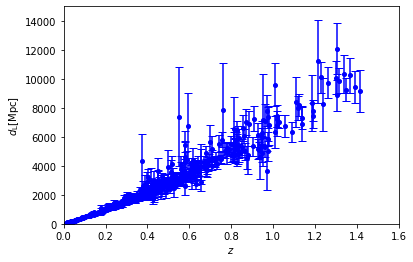

In [5]:
plt.xlim(0,1.6)
plt.ylim(0,15000)
plt.xlabel('$z$')
plt.ylabel("$d_{\mathrm{L}}[\mathrm{Mpc}]$")
plt.errorbar(z_JLA,dl_JLA,yerr=sig_dl_JLA,fmt='.', markersize=8,capsize=4,color='blue')

### Now Calculate Velocity from Redshift <bR> Its easy to calcualte redshift from velocity using: <br> $$z=\sqrt{\dfrac{c+v}{c-v}}-1$$ But reverse is not trivial, can be determine velocity using $$v=c-\dfrac{2c}{(z+1)^2+1} $$

In [6]:
c=299792.5
v_JLA=c-((2*c)/((z_JLA+1)**2+1))

# Plot Velocity versus Luminosity Distance 

<ErrorbarContainer object of 3 artists>

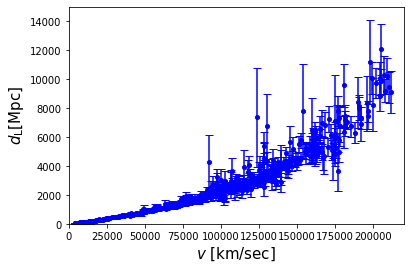

In [7]:
plt.xlim(0,220000)
plt.ylim(0,15000)
plt.xlabel('$v~[\mathrm{km/sec}]$',size=15)
plt.ylabel("$d_{\mathrm{L}}[\mathrm{Mpc}]$",size=15)
plt.errorbar(v_JLA,dl_JLA,yerr=sig_dl_JLA,fmt='.', markersize=8,capsize=4,color='blue')
# plt.errorbar(v_JLA,dl_JLA,yerr=sig_dl_JLA,fmt='.')

### From Hubble's Law: <br> $$v\propto d$$ <br> $$\Rightarrow v=H_0d$$

### So Now what I'm going to do is that I'll supply the different value of $H_0$ and see which one looks better fit! <br> Its not a scientific apporach to find the best fit value of $H_0$ based on $v$ and $d_L$ datapoints. 

# $\color{red}{\text{Method-I}^{\text{st}}}$-A Random Guess for $H_0$

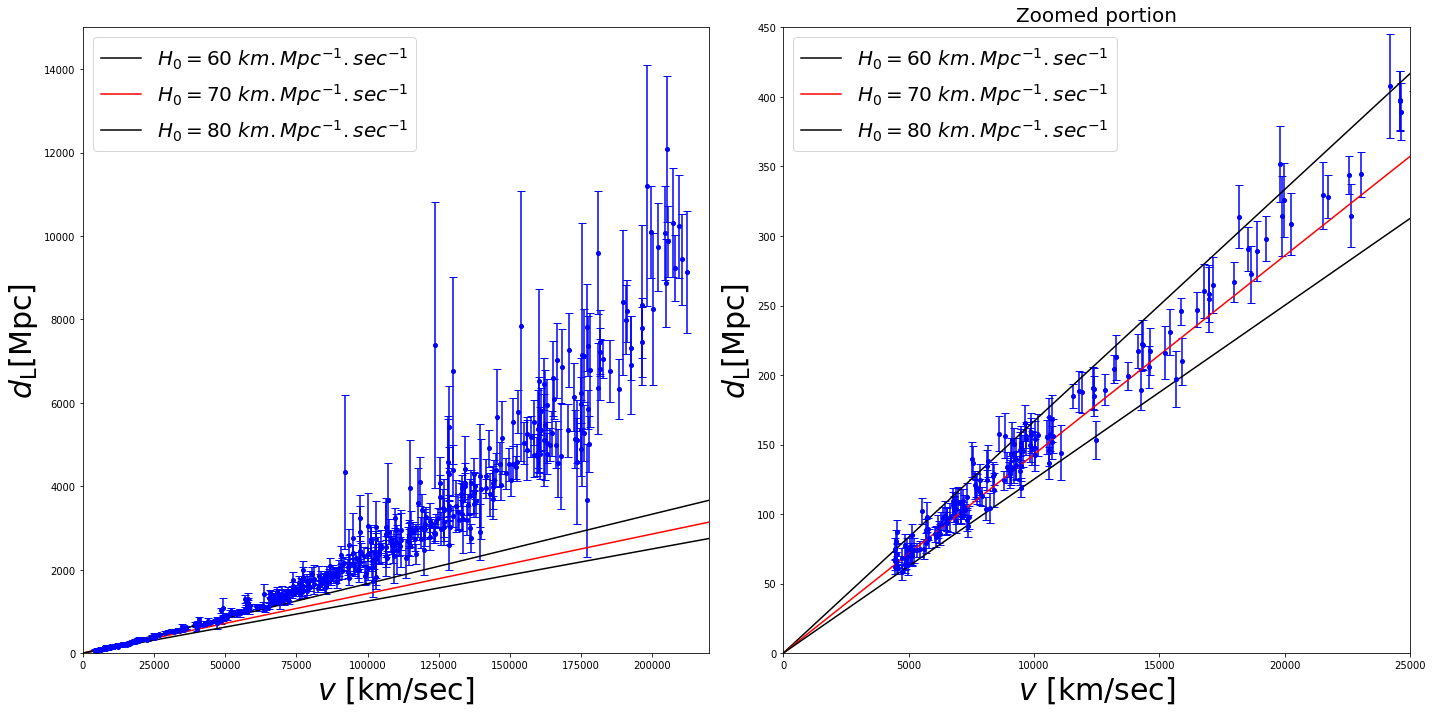

In [8]:
H0_1=60
H0_2=70
H0_3=80
dl_H0=np.arange(0,10000)
v_H0_1=H0_1*dl_H0
v_H0_2=H0_2*dl_H0
v_H0_3=H0_3*dl_H0
fig = plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.xlim(0,220000)
plt.ylim(0,15000)
plt.xlabel('$v~[\mathrm{km/sec}]$',size=30)
plt.ylabel("$d_{\mathrm{L}}[\mathrm{Mpc}]$",size=30)
plt.errorbar(v_JLA,dl_JLA,yerr=sig_dl_JLA,fmt='.', markersize=8,capsize=4,color='blue')
plt.plot(v_H0_1,dl_H0,color='black',label='$H_0=60~km.Mpc^{-1}.sec^{-1}$')
plt.plot(v_H0_2,dl_H0,color='red',label='$H_0=70~km.Mpc^{-1}.sec^{-1}$')
plt.plot(v_H0_3,dl_H0,color='black',label='$H_0=80~km.Mpc^{-1}.sec^{-1}$')
plt.legend(loc="upper left",prop={'size': 20})
plt.tight_layout()

plt.subplot(1, 2, 2)
plt.title('Zoomed portion',size=20)
plt.xlim(0,25000)
plt.ylim(0,450)
plt.xlabel('$v~[\mathrm{km/sec}]$',size=30)
plt.ylabel("$d_{\mathrm{L}}[\mathrm{Mpc}]$",size=30)
plt.errorbar(v_JLA,dl_JLA,yerr=sig_dl_JLA,fmt='.', markersize=8,capsize=4,color='blue')
plt.plot(v_H0_1,dl_H0,color='black',label='$H_0=60~km.Mpc^{-1}.sec^{-1}$')
plt.plot(v_H0_2,dl_H0,color='red',label='$H_0=70~km.Mpc^{-1}.sec^{-1}$')
plt.plot(v_H0_3,dl_H0,color='black',label='$H_0=80~km.Mpc^{-1}.sec^{-1}$')
plt.legend(loc="upper left",prop={'size': 20})
plt.tight_layout()

## We find that the best guess value of $H_0$ is $70~km.Mpc^{-1}.sec^{-1}$ which repsrent datapoint upto ~400 Mpc. 

# -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Now lets move to the scientific approach to estimate the Hubble Lemaitre Constant by fitting the dataset via lmfit-a python based module.

# $\color{red}{\text{Method-II}^{\text{nd}}}$- Fit $H_0$ statistically

In [9]:
!pip install lmfit
!pip install sympy

# For a now, we're going to select datapoints upto $d_L=400Mpc$ since rest of points don't follow a linear relation!

### Now lets save datapoints in a file then arrange in asceding order to get $d_L<400Mpc$

In [10]:
from pandas import DataFrame
np.savetxt('Text_Files/Github_2_Hubble_Value.txt', np.transpose([v_JLA,dl_JLA,sig_dl_JLA]),
           fmt='%-0.2f',header='',newline='\n',delimiter=' ')
df = pd.read_csv ('Text_Files/Github_2_Hubble_Value.txt',sep=' ',keep_default_na=False,names=["a","b","c"])
df_ascen= df.sort_values('b', ascending=True)

In [11]:
df_ascen=df_ascen[(df_ascen['b'] <400)]
x=df_ascen['a']
y=df_ascen['b']
yerr=df_ascen['c']

# Run lmfit 

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from lmfit.models import PolynomialModel
from lmfit.models import ExpressionModel
model = ExpressionModel('(x/H0)')
pars = model.make_params(H0=10)
result = model.fit(y, pars, x=x, weights=1.0/yerr, method="leastsq")
for param in result.params.values():
    print("%s:  %f +/- %f " % (param.name, param.value, param.stderr))
# print(result.fit_report())  # use to see full track!

H0:  67.352572 +/- 0.385806 


# So we find the best fit value of $H_0=67.353\pm0.386~km.Mpc^{-1}.sec^{-1}$
## Our guess value (70) was not too bad!    ☺️

# Final Plot

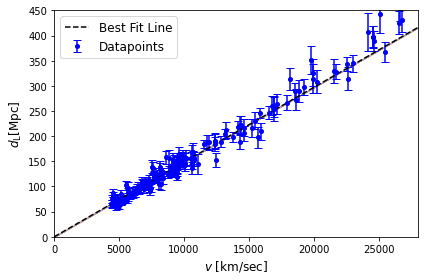

In [13]:
H0_f=67.352572
sig_H0_f=0.385806
v_H0_f=np.arange(0,28000)
dl_H0_f=v_H0_f/H0_f
sig_dl_H0_f=dl_H0_f*sig_H0_f/H0_f**2
plt.xlim(0,28000)
plt.ylim(0,450)
plt.xlabel('$v~[\mathrm{km/sec}]$',size=12)
plt.ylabel("$d_{\mathrm{L}}[\mathrm{Mpc}]$",size=12)
plt.errorbar(v_JLA,dl_JLA,yerr=sig_dl_JLA,fmt='.', markersize=8,capsize=4,color='blue',label='Datapoints')
plt.plot(v_H0_f, dl_H0_f, 'k--',label='Best Fit Line')
plt.fill_between(v_H0_f, dl_H0_f-2*sig_dl_H0_f, dl_H0_f+2*sig_dl_H0_f, color="r")
plt.fill_between(v_H0_f, dl_H0_f-sig_dl_H0_f, dl_H0_f+sig_dl_H0_f, color="#ABABAB")
plt.legend(loc="upper left",prop={'size': 12})
plt.tight_layout()

### We can't see the $1\sigma$ and $2\sigma$ Regions however they are quite small!

# ----------------------------->End for a now<-----------------------------